In this project we are going to explore all of the possibilities of merging two datasets, in particular the 'how' argument of pd.merge

- pd.merge(summer, countries, on='Country', how='left')
- pd.merge(summer, countries, on='Country', how='right')
- pd.merge(summer, countries, on='Country', how='inner')
- pd.merge(summer, countries, on='Country', how='outer')

Merging is a pretty confusing part of data preprocessing, so this notebook will hopefully help not only me, but you too, to have clear in mind how to merge two datasets 

In [1]:
import pandas as pd

import missingno as msno

In [2]:
countries = pd.read_csv('countries.csv')
summer = pd.read_csv('summer.csv')

we will merge these two datasets

In [3]:
countries

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [4]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


'countries' dataset: it contains all of the current countries in the world, with their 3 letter code, the population and the GDP per capita

'summer' dataset: each row represents an athlete of the olympic games. The dataset contains all of the athletes that took part to summer olympic games up until 2012, and their relative country, discipline, gender, etc. 

NOTE: we will merge this two datasets by Country. However, because 'summer' has data for all the olympic games since 1896, it contains countries that no longer exist. Therefore, the list of countries in 'summer' and 'countries', differ. This is at the same time a problem and a fantastic news for us.

It's a problem because it makes merging tricky, but it is great because it will allow us to really understand and learn how to merge. In real life, the columns will almost always be different

# Some data preprocessing

let's quickly check the missing values in both datasets

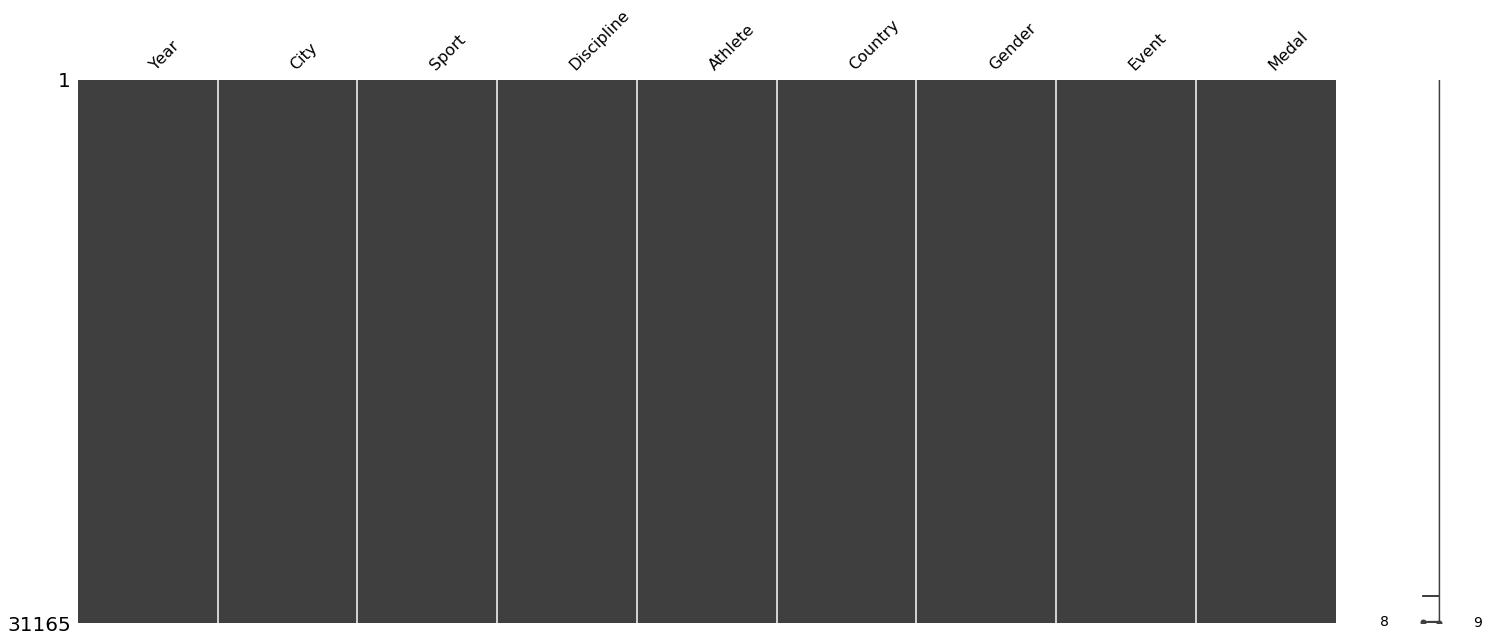

In [5]:
msno.matrix(summer);

In [6]:
summer[summer.isnull().any(axis=1)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


Let's get rid of these rows

In [7]:
summer.drop(index=summer[summer.isnull().any(axis=1)].index, inplace=True)

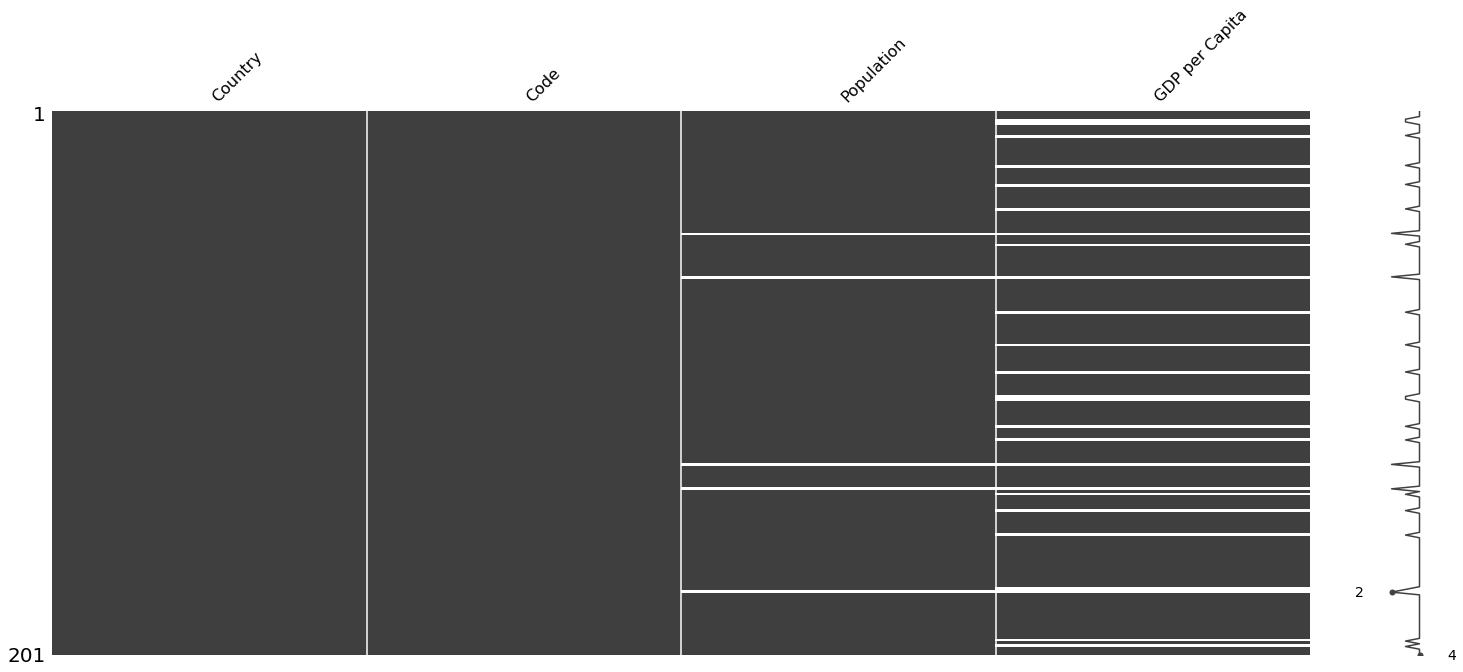

In [8]:
msno.matrix(countries);

For the sake of the project, we will delete the column 'GDP per Capita'.
So, let's see what are the countries of which population data is missing

In [9]:
countries[countries['Population'].isnull()]

,Country,Code,Population,GDP per Capita
45,Cook Islands,COK,NaN,NaN
61,Eritrea,ERI,NaN,NaN
130,Netherlands Antilles*,AHO,NaN,NaN
139,"Palestine, Occupied Territories",PLE,NaN,NaN
177,Taiwan,TPE,NaN,NaN


Let's get rid of these countries from our project

In [10]:
countries = countries[countries['Population'].notna()]

Ok, we will not have any missing values in any of our datasets

We want to merge the two datasets by the 3-letters country code. In other words, we want to have a brand new dataset where each row represents an athlete, and the columns are those of the 'summer dataset' and the 'countries dataset'. 

To make it all clearer, let's delete some columns from the 'summer' and 'countries' datasets that we will not need for the sake of this project.

In [11]:
summer.drop(columns=['Year', 'City', 'Sport', 'Discipline', 'Gender', 'Event'], inplace=True)

In [12]:
countries.drop(columns=['Country', 'GDP per Capita'], inplace=True)

/Users/yaroslavhavrysh/Desktop/house_pricing_kaggle/env/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
summer

,Athlete,Country,Medal
0,"HAJOS, Alfred",HUN,Gold
1,"HERSCHMANN, Otto",AUT,Silver
2,"DRIVAS, Dimitrios",GRE,Bronze
3,"MALOKINIS, Ioannis",GRE,Gold
4,"CHASAPIS, Spiridon",GRE,Silver
...,...,...,...
31160,"JANIKOWSKI, Damian",POL,Bronze
31161,"REZAEI, Ghasem Gholamreza",IRI,Gold
31162,"TOTROV, Rustam",RUS,Silver
31163,"ALEKSANYAN, Artur",ARM,Bronze


In [14]:
countries

,Code,Population
0,AFG,32526562.0
1,ALB,2889167.0
2,ALG,39666519.0
3,ASA,55538.0
4,AND,70473.0
...,...,...
196,VIE,91703800.0
197,ISV,103574.0
198,YEM,26832215.0
199,ZAM,16211767.0


Ok, now... Because we want to merge the two datasets by the 3-letters code country, we want those columns to have the same name. It'll make it easier.

In [15]:
countries.rename(columns={'Code':'Country'}, inplace=True)

/Users/yaroslavhavrysh/Desktop/house_pricing_kaggle/env/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
countries

,Country,Population
0,AFG,32526562.0
1,ALB,2889167.0
2,ALG,39666519.0
3,ASA,55538.0
4,AND,70473.0
...,...,...
196,VIE,91703800.0
197,ISV,103574.0
198,YEM,26832215.0
199,ZAM,16211767.0


perfect, let's explore all of the merging possibilities

In [17]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    Parameters
    ----------
    left : DataFrame
  

* left: use only keys from left frame, similar to a SQL left outer join; preserve key order.
* right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
* outer: use union of keys from both frames, similar to a SQL full outer
  join; sort keys lexicographically.
* inner: use intersection of keys from both frames, similar to a SQL inner
  join; preserve the order of the left keys.
* cross: creates the cartesian product from both frames, preserves the order
  of the left keys. (We will not do this one because it is a very special case)

# MERGING

We have different possible outcomes after merging, depending on what type of merging we want to do.

Our resulting dataset can have:
- all of the athletes (both of countries that still exist or do not exist)
- the athletes that compete / competed only for countries that still exist. All of the other athletes (from no longer existing countries like the Soviet Union, will be excluded)
- union of the athletes dataset and the country dataset. Union ≠ Join

Let's do it

# LEFT JOIN

left: use only keys from left frame, similar to a SQL left outer join; preserve key order.

In [18]:
left_1 = pd.merge(summer, countries, on='Country', how='left')
left_2 = pd.merge(countries, summer, on='Country', how='left')

In [19]:
left_1

,Athlete,Country,Medal,Population
0,"HAJOS, Alfred",HUN,Gold,9844686.0
1,"HERSCHMANN, Otto",AUT,Silver,8611088.0
2,"DRIVAS, Dimitrios",GRE,Bronze,10823732.0
3,"MALOKINIS, Ioannis",GRE,Gold,10823732.0
4,"CHASAPIS, Spiridon",GRE,Silver,10823732.0
...,...,...,...,...
31156,"JANIKOWSKI, Damian",POL,Bronze,37999494.0
31157,"REZAEI, Ghasem Gholamreza",IRI,Gold,79109272.0
31158,"TOTROV, Rustam",RUS,Silver,144096812.0
31159,"ALEKSANYAN, Artur",ARM,Bronze,3017712.0


In [20]:
left_2

,Country,Population,Athlete,Medal
0,AFG,32526562.0,"NIKPAI, Rohullah",Bronze
1,AFG,32526562.0,"NIKPAI, Rohullah",Bronze
2,ALB,2889167.0,NaN,NaN
3,ALG,39666519.0,"ZAOUI, Mohamed",Bronze
4,ALG,39666519.0,"MOUSSA, Mustapha",Bronze
...,...,...,...,...
25761,ZIM,15602751.0,"COVENTRY, Kirsty",Bronze
25762,ZIM,15602751.0,"COVENTRY, Kirsty",Silver
25763,ZIM,15602751.0,"COVENTRY, Kirsty",Gold
25764,ZIM,15602751.0,"COVENTRY, Kirsty",Silver


for left_1 we typed 'summer' before 'countries', whereas for left_2 we typed 'countries' before 'summer'.
What we notice right off the bat is that left_1 has 31161 rows (athletes), and left_2 has 25766 rows (athletes).

Why is that?

Let's see how many rows does the 'summer' dataset have BEFORE doing the merging with the 'countries' dataset.

In [21]:
print("number of rows before merging: ", len(summer))
print("number of rows of left_1 after merging: ", len(left_1))
print("number of rows of left_2 after merging: ", len(left_2), ", precisely ", len(left_1) - len(left_2), "rows less than 'summer'")

number of rows before merging:  31161
number of rows of left_1 after merging:  31161
number of rows of left_2 after merging:  25766 , precisely  5395 rows less than 'summer'


Why have we lost 5395 in left_2?

Because the argument pd.merge(how = 'left') uses only keys from the left frame.
What is the left frame? It's the argument we specified first.

left_1 = pd.merge(summer, countries, on='Country', how='left')

left_2 = pd.merge(countries, summer, on='Country', how='left')

In left_1 we specified 'summer' first, so left_1 will have only keys (country codes) from the dataset 'summer'.
left_2 will have only keys from 'countries'. As I mentioned before, not all of the country codes in 'summer' are present in 'countries', and viceversa. Therefore, by specifying 'summer' or 'countries' first in our pd.merge, we are basically telling python which codes we want to be in the new merged dataset, and which ones to exclude.

What does it mean "have only keys from summer" and "have only keys from countries"?

Basically, the column "Country" in 'summer' has a set of 3-letter codes indicating the countries of origin of the athletes. 
The column "Country" in 'countries' has a set of 3-letter codes indicating the countries of the world.
Because we are merging 'summer' and 'countries' by 'Country' column, our function pd.merge will find all the 3-letter codes from one dataset that match with the 3-letter codes of the other dataset, and will merge them based on these 3-letter codes.
However, some of the codes don't match, and these values are indeed lost.

This is because our 'summer' dataset contains athletes that participated to the olympic games for countries that no longer exist, whereas the 'countries' dataset contains only the countries that exist at the present moment.

When we merge creating the new dataset left_1, by specifying 'summer' before 'countries', we are basically saying:"I want the new dataset left_1 to have only the 3-letter codes from the 'summer' dataset."
Because the 'summer' dataset has athletes for example from the former Soviet Union, and our 'countries' dataset doesn't have the Soviet Union at all, our new left_1 will still contain these athletes from the Soviet Union, BUT IT WILL NOT HAVE THE INFORMATION RELATED TO THE POPULATION OF THE SOVIET UNION. The column "population" in the new dataset will be NaN, for those athletes from the Soviet Union. NEVERTHELESS, THESE ATHLETES WILL STILL BE IN THE NEW DATASET.

On the other hand, 

left_2 = pd.merge(countries, summer, on='Country', how='left')

In left_2 we specified 'countries' first, so left_2 will have only keys from 'countries'. There will be no athlete from the Soviet Union in left_2, because we are basically saying:"Hey, merge the two datasets, but I want only the 3-letter codes from the countries dataset. All of the 3-letter codes in 'summer' that are not present in 'countries', don't include them in the new dataset left_2.

Hence, left_2 will be without all those athletes that used to represent countries that no longer exist.

In [22]:
left_1[left_1.isnull().any(axis=1)]

,Athlete,Country,Medal,Population
132,"FLACK, Edwin",ZZX,Bronze,NaN
133,"ROBERTSON, George Stuart",ZZX,Bronze,NaN
134,"BOLAND, John",ZZX,Gold,NaN
135,"TRAUN, Friedrich",ZZX,Gold,NaN
136,"KASDAGLIS, Dionysios",ZZX,Silver,NaN
...,...,...,...,...
30909,"MANDIC, Milica",SRB,Gold,NaN
30920,"TSENG, Li-Cheng",TPE,Bronze,NaN
31059,"HSU, Shu-Ching",TPE,Gold,NaN
31075,"MARTIN, Razvan Constantin",ROU,Bronze,NaN


left_1 has 5465 rows with missing population. As we said, these are the athletes that used to compete for countries that no longer exist.
However, we have just seen that left_2 has 5395 rows less than 'summer', meaning 5395 athletes who used to compete for countries that no longer exist. Not 5465 as we just found out in left_1 having missing population. 
What is this difference of 70?

Let's check if by chance any other column but "Population" has missing values:

In [23]:
left_1[left_1[['Athlete', 'Country', 'Medal']].isnull().any(axis=1)]

,Athlete,Country,Medal,Population


Nope. So, all of the 5465 rows that have a missing values, have it in the population column. Which means that these athletes are the ones who competed for countries who no longer exist. But still, they should be 5395, no?

This difference of 70 is because left_2 HAS ALSO ROWS OF ONLY COUNTRIES AND NO ATHLETES. THESE ROWS ARE SIMPLY TAKEN FROM 'countries', AND THERE IS NO MATCH BETWEEN ANY ATHLETE IN 'summer' AND THESE COUNTRIES.
However, this is exactly what we should expect because this is how LEFT JOIN and RIGHT JOIN work: they include all of the keys of the dataset we chose.

Let's check indeed if there are any rows in left_2 without any information about athletes and medals:

In [24]:
left_2[left_2.isnull().any(axis=1)]

,Country,Population,Athlete,Medal
2,ALB,2889167.0,NaN,NaN
18,ASA,55538.0,NaN,NaN
19,AND,70473.0,NaN,NaN
20,ANG,25021974.0,NaN,NaN
21,ANT,91818.0,NaN,NaN
...,...,...,...,...
17011,SOM,10787104.0,NaN,NaN
17565,SWZ,1286970.0,NaN,NaN
19141,TKM,5373502.0,NaN,NaN
25724,VAN,264652.0,NaN,NaN


There are exactly 70 rows in left_2 with only countries and no athletes.

But... What if we don't want these rows? What if what we want from our merging is A DATASET THAT HAS ONLY ATHLETES THAT COMPETED IN COUNTRIES THAT EXIST NOWADAYS?
Let's rememeber that neither left_1 nor left_2 follow these criteria.

left_1 contains all of the athletes that competed for countries that either still exist or no longer exist

left_2 contains all of the athletes that competed for countries that still exist, but it also contains rows with only countries.

To accomodate both the criteria, we will use an INNER JOIN

Before doing the inner join, let's just quickly cover the right join, because it is basically the same as the left join

# RIGHT JOIN

it is the same thing as left join, just that the order by which we specify 'summer' and 'countries' is inverted

In [25]:
right_1 = pd.merge(summer, countries, on='Country', how='right')
right_2 = pd.merge(countries, summer, on='Country', how='right')

In [26]:
right_1

,Athlete,Country,Medal,Population
0,"NIKPAI, Rohullah",AFG,Bronze,32526562.0
1,"NIKPAI, Rohullah",AFG,Bronze,32526562.0
2,NaN,ALB,NaN,2889167.0
3,"ZAOUI, Mohamed",ALG,Bronze,39666519.0
4,"MOUSSA, Mustapha",ALG,Bronze,39666519.0
...,...,...,...,...
25761,"COVENTRY, Kirsty",ZIM,Bronze,15602751.0
25762,"COVENTRY, Kirsty",ZIM,Silver,15602751.0
25763,"COVENTRY, Kirsty",ZIM,Gold,15602751.0
25764,"COVENTRY, Kirsty",ZIM,Silver,15602751.0


In [27]:
right_2

,Country,Population,Athlete,Medal
0,HUN,9844686.0,"HAJOS, Alfred",Gold
1,AUT,8611088.0,"HERSCHMANN, Otto",Silver
2,GRE,10823732.0,"DRIVAS, Dimitrios",Bronze
3,GRE,10823732.0,"MALOKINIS, Ioannis",Gold
4,GRE,10823732.0,"CHASAPIS, Spiridon",Silver
...,...,...,...,...
31156,POL,37999494.0,"JANIKOWSKI, Damian",Bronze
31157,IRI,79109272.0,"REZAEI, Ghasem Gholamreza",Gold
31158,RUS,144096812.0,"TOTROV, Rustam",Silver
31159,ARM,3017712.0,"ALEKSANYAN, Artur",Bronze


In [28]:
print("number of rows of 'summer' before merging: ", len(summer))
print("")
print("number of rows of left_1 after merging: ", len(left_1))
print("number of rows of left_2 after merging: ", len(left_2), ", precisely ", len(left_1) - len(left_2), "rows less than 'summer'")
print("")
print("number of rows of right_1 after merging: ", len(right_1), ", precisely ", len(right_2) - len(right_1), "rows less than 'summer'")
print("number of rows of right_2 after merging: ", len(right_2))

number of rows of 'summer' before merging:  31161

number of rows of left_1 after merging:  31161
number of rows of left_2 after merging:  25766 , precisely  5395 rows less than 'summer'

number of rows of right_1 after merging:  25766 , precisely  5395 rows less than 'summer'
number of rows of right_2 after merging:  31161


So basically:

left_1 = right_2 

left_2 = right_1

More precisely:

- left_1 = pd.merge(summer, countries, on='Country', how='left')
- right_2 = pd.merge(countries, summer, on='Country', how='right')
 
 
- left_2 = pd.merge(countries, summer, on='Country', how='left')
- right_1 = pd.merge(summer, countries, on='Country', how='right')

# INNER JOIN

The inner join uses an intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.

In [29]:
inner_1 = pd.merge(summer, countries, on='Country', how='inner')
inner_2 = pd.merge(countries, summer, on='Country', how='inner')

In [30]:
inner_1

,Athlete,Country,Medal,Population
0,"HAJOS, Alfred",HUN,Gold,9844686.0
1,"HAJOS, Alfred",HUN,Gold,9844686.0
2,"SZOKOLYI, Alajos",HUN,Bronze,9844686.0
3,"DANI, Nandor",HUN,Silver,9844686.0
4,"KELLNER, Gyula",HUN,Bronze,9844686.0
...,...,...,...,...
25691,"BARRONDO, Erick",GUA,Silver,16342897.0
25692,"JAMES, Kirani",GRN,Gold,106825.0
25693,"AMOS, Nijel",BOT,Silver,2262485.0
25694,"KONTIDES, Pavlos",CYP,Silver,1165300.0


In [31]:
inner_2

,Country,Population,Athlete,Medal
0,AFG,32526562.0,"NIKPAI, Rohullah",Bronze
1,AFG,32526562.0,"NIKPAI, Rohullah",Bronze
2,ALG,39666519.0,"ZAOUI, Mohamed",Bronze
3,ALG,39666519.0,"MOUSSA, Mustapha",Bronze
4,ALG,39666519.0,"BOULMERKA, Hassiba",Gold
...,...,...,...,...
25691,ZIM,15602751.0,"COVENTRY, Kirsty",Bronze
25692,ZIM,15602751.0,"COVENTRY, Kirsty",Silver
25693,ZIM,15602751.0,"COVENTRY, Kirsty",Gold
25694,ZIM,15602751.0,"COVENTRY, Kirsty",Silver


In [32]:
print("number of rows of 'summer' before merging: ", len(summer))
print("")
print("number of rows of left_1 after merging: ", len(left_1))
print("number of rows of left_2 after merging: ", len(left_2), ", precisely ", len(left_1) - len(left_2), "rows less than 'summer'")
print("")
print("number of rows of right_1 after merging: ", len(right_1), ", precisely ", len(right_2) - len(right_1), "rows less than 'summer'")
print("number of rows of right_2 after merging: ", len(right_2))
print("")
print("number of rows of inner_1 after merging: ", len(inner_1), ", precisely ", len(left_2) - len(inner_1), "rows less than 'left_2'")
print("number of rows of inner_2 after merging: ", len(inner_2))

number of rows of 'summer' before merging:  31161

number of rows of left_1 after merging:  31161
number of rows of left_2 after merging:  25766 , precisely  5395 rows less than 'summer'

number of rows of right_1 after merging:  25766 , precisely  5395 rows less than 'summer'
number of rows of right_2 after merging:  31161

number of rows of inner_1 after merging:  25696 , precisely  70 rows less than 'left_2'
number of rows of inner_2 after merging:  25696


Inner_1 and Inner_2 have EXACTLY 70 rows less than left_2.

This is Because Inner_1 and Inner_2 are intersections of 'summer' and 'countries', based on the country code. In other words, we said:"Hey Python, give us a new dataset with the information from countries and summer, but include ONLY the rows where the country code matches in BOTH the datasets"

The left/right joins are different than the Inner joins exactly for this reason. Left and Right joins include ALL of the codes from one of the datasets, and get rid of the codes that don't match from the other dataset.
The inner joins include ONLY the codes that are present in both the datasets

In [33]:
inner_1.isna().any(axis=1).value_counts()

False    25696
dtype: int64

There are no missing values. And it does make sense, because of the definition of 'inner joins' we just explained above

# OUTER UNION

Outer join uses union of keys from both frames, similar to a SQL full outer join;
It basically doesn't care if there is no match between the columns used for the merging. It merges them all.

In [34]:
outer_1 = pd.merge(summer, countries, on='Country', how='outer')
outer_1

,Athlete,Country,Medal,Population
0,"HAJOS, Alfred",HUN,Gold,9844686.0
1,"HAJOS, Alfred",HUN,Gold,9844686.0
2,"SZOKOLYI, Alajos",HUN,Bronze,9844686.0
3,"DANI, Nandor",HUN,Silver,9844686.0
4,"KELLNER, Gyula",HUN,Bronze,9844686.0
...,...,...,...,...
31226,NaN,SOM,NaN,10787104.0
31227,NaN,SWZ,NaN,1286970.0
31228,NaN,TKM,NaN,5373502.0
31229,NaN,VAN,NaN,264652.0


In [35]:
outer_2 = pd.merge(countries, summer, on='Country', how='outer')
outer_2

,Country,Population,Athlete,Medal
0,AFG,32526562.0,"NIKPAI, Rohullah",Bronze
1,AFG,32526562.0,"NIKPAI, Rohullah",Bronze
2,ALB,2889167.0,NaN,NaN
3,ALG,39666519.0,"ZAOUI, Mohamed",Bronze
4,ALG,39666519.0,"MOUSSA, Mustapha",Bronze
...,...,...,...,...
31226,MNE,NaN,"VUKCEVIC, Marina",Silver
31227,SGP,NaN,"FENG, Tian Wei",Bronze
31228,SGP,NaN,"FENG, Tian Wei",Bronze
31229,SGP,NaN,"LI, Jia Wei",Bronze


In [36]:
print("number of rows of 'summer' before merging: ", len(summer))
print("")
print("number of rows of left_1 after merging: ", len(left_1))
print("number of rows of left_2 after merging: ", len(left_2), ", precisely ", len(left_1) - len(left_2), "rows less than 'summer'")
print("")
print("number of rows of right_1 after merging: ", len(right_1), ", precisely ", len(right_2) - len(right_1), "rows less than 'summer'")
print("number of rows of right_2 after merging: ", len(right_2))
print("")
print("number of rows of inner_1 after merging: ", len(inner_1), ", precisely ", len(left_2) - len(inner_1), "rows less than 'left_2'")
print("number of rows of inner_2 after merging: ", len(inner_2))
print("")
print("number of rows of outer_1 after merging:", len(outer_1), ", precisely", len(summer), "(number of rows in 'summer') + 70 (the countries not present in 'summer' but present in 'countries'")

number of rows of 'summer' before merging:  31161

number of rows of left_1 after merging:  31161
number of rows of left_2 after merging:  25766 , precisely  5395 rows less than 'summer'

number of rows of right_1 after merging:  25766 , precisely  5395 rows less than 'summer'
number of rows of right_2 after merging:  31161

number of rows of inner_1 after merging:  25696 , precisely  70 rows less than 'left_2'
number of rows of inner_2 after merging:  25696

number of rows of outer_1 after merging: 31231 , precisely 31161 (number of rows in 'summer') + 70 (the countries not present in 'summer' but present in 'countries'
